In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import os

input_dir = '../_data/lish-moa'

os.listdir(input_dir)

['zip files',
 'train_targets_nonscored.csv',
 '.DS_Store',
 'test_features.csv',
 'train_targets_scored.csv',
 'train_features.csv',
 'sample_submission.csv']

In [7]:
os.path.join(input_dir, 'train_features.csv')

'../_data/lish-moa/train_features.csv'

In [8]:
trn_feat = pd.read_csv(os.path.join(input_dir, 'train_features.csv'))
tst_feat = pd.read_csv(os.path.join(input_dir, 'test_features.csv'))

target_scored = pd.read_csv(os.path.join(input_dir, 'train_targets_scored.csv'))
target_nonscored = pd.read_csv(os.path.join(input_dir, 'train_targets_nonscored.csv'))

sub = pd.read_csv(os.path.join(input_dir, 'sample_submission.csv'))

In [9]:
trn_feat.sort_values(by='sig_id', inplace=True)
target_scored.sort_values(by='sig_id', inplace=True)
target_nonscored.sort_values(by='sig_id', inplace=True)

tst_feat.sort_values(by='sig_id', inplace=True)
sub.sort_values(by='sig_id', inplace=True)

In [10]:
trn_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.3+ MB


In [11]:
tst_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 26.6+ MB


In [12]:
target_scored.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.8+ MB


In [13]:
target_nonscored.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23814 entries, 0 to 23813
Columns: 403 entries, sig_id to xiap_inhibitor
dtypes: int64(402), object(1)
memory usage: 73.4+ MB


In [14]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: float64(206), object(1)
memory usage: 6.3+ MB


### train_features.csv, test_features.csv

In [18]:
trn_feat.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [19]:
tst_feat.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [21]:
trn_feat.columns.tolist() == tst_feat.columns.tolist()

True

In [22]:
trn_feat['cp_type'].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [23]:
trn_feat['cp_time'].value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [24]:
trn_feat['cp_dose'].value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

In [109]:
gene_columns = [c for c in trn_feat.columns if c.startswith('g-')]
cell_columns = [c for c in trn_feat.columns if c.startswith('c-')]

In [110]:
print(len(gene_columns), len(cell_columns))

772 100


* gene expression columns value distribution

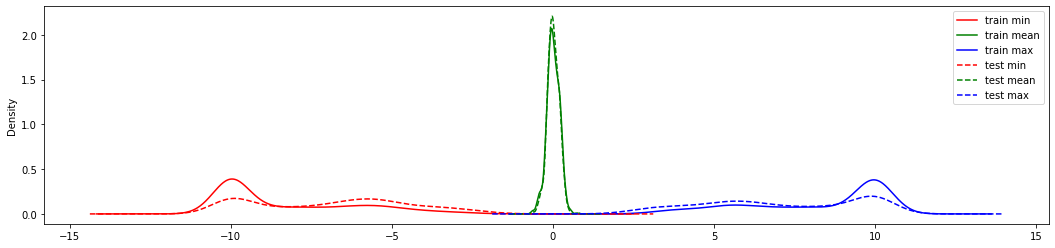

In [67]:
tmp1 = trn_feat[gene_columns].describe().T
tmp2 = tst_feat[gene_columns].describe().T

plt.rcParams['figure.figsize'] = (18, 4)

tmp1['min'].plot(kind='density', color='r', label='train min')
tmp1['mean'].plot(kind='density', color='g', label='train mean')
tmp1['max'].plot(kind='density', color='b', label='train max')

tmp2['min'].plot(kind='density', color='r', linestyle='--', label='test min')
tmp2['mean'].plot(kind='density', color='g', linestyle='--', label='test mean')
tmp2['max'].plot(kind='density', color='b', linestyle='--', label='test max')

plt.legend(loc='best')
plt.show()

* cell viability value distribution

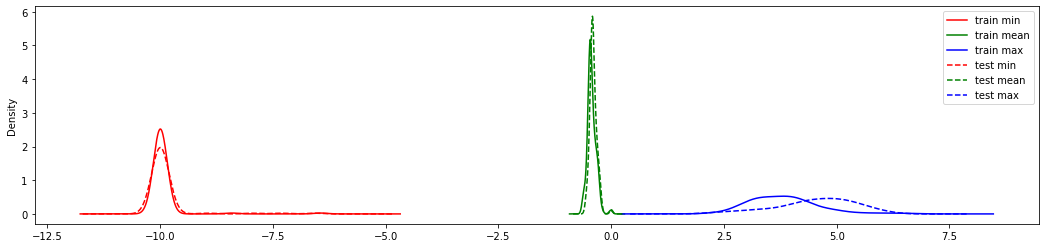

In [68]:
tmp1 = trn_feat[cell_columns].describe().T
tmp2 = tst_feat[cell_columns].describe().T

plt.rcParams['figure.figsize'] = (18, 4)

tmp1['min'].plot(kind='density', color='r', label='train min')
tmp1['mean'].plot(kind='density', color='g', label='train mean')
tmp1['max'].plot(kind='density', color='b', label='train max')

tmp2['min'].plot(kind='density', color='r', linestyle='--', label='test min')
tmp2['mean'].plot(kind='density', color='g', linestyle='--', label='test mean')
tmp2['max'].plot(kind='density', color='b', linestyle='--', label='test max')

plt.legend(loc='best')
plt.show()



In [84]:
print(trn_feat['sig_id'].nunique(), trn_feat.shape[0])
print(tst_feat['sig_id'].nunique(), tst_feat.shape[0])

23814 23814
3982 3982


In [86]:
tst_feat['sig_id'].isin(trn_feat['sig_id']).sum()

0

Each sig_id only appears once and there are no repeated sig_ids between train and test data.

### target_scored.csv

In [ ]:
print(target_scored.shape)
print(target_scored.head())

In [73]:
scored_columns = target_scored.columns.tolist()
nonscored_columns = target_nonscored.columns.tolist()
sub_columns = sub.columns.tolist()

In [90]:
if 'sig_id' in scored_columns: 
    scored_columns.remove('sig_id')

if 'sig_id' in nonscored_columns:
    nonscored_columns.remove('sig_id')
    
if 'sig_id' in sub_columns:
    sub_columns.remove('sig_id')

In [88]:
set(nonscored_columns).intersection(scored_columns)

set()

In [99]:
scored_columns == sub_columns

True

In [106]:
tmp = target_scored[scored_columns].nunique()
(tmp == 2).all()

True

* All columns in target_scored are bool (0/1).

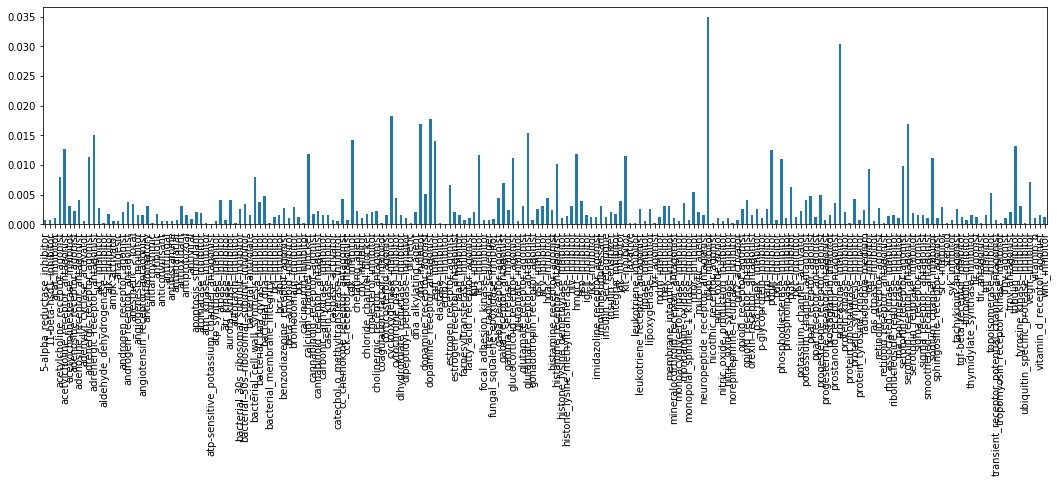

In [115]:
_ = target_scored[scored_columns].mean().plot.bar()

In [123]:
target_scored[scored_columns].equals(c)

False

In [131]:
similarity_columns = ['==' + c for c in scored_columns]
similarity = pd.DataFrame(0, index=scored_columns, columns=similarity_columns)

N = len(scored_columns)
for i in range(N):
    c1 = scored_columns[i]
    df1 = target_scored[c1]
    for j in range(i, N):
        c2 = scored_columns[j]
        df2 = target_scored[c2]
        
        similarity.iloc[i, j] = (df1 == df2).mean()
        if i != j:
            similarity.iloc[j, i] = similarity.iloc[i, j]

In [137]:
similarity.min().min()

0.9472579155118838

1. All targets are highly unbalanced. The highest postive rate is under 0.035.
2. According to 1., all targets look highly similar.

In [146]:
target_scored[scored_columns].head().sum(axis=1)

0    1
1    0
2    3
3    0
4    1
dtype: int64

### target_nonscored.csv

In [110]:
tmp = target_nonscored[nonscored_columns].nunique()

In [ ]:
for c in nonscored_columns:
    vals = target_nonscored[c].unique()
    if len(vals) != 2:
        print(c, vals)

* All columns in target_nonscored are bool (0/1).

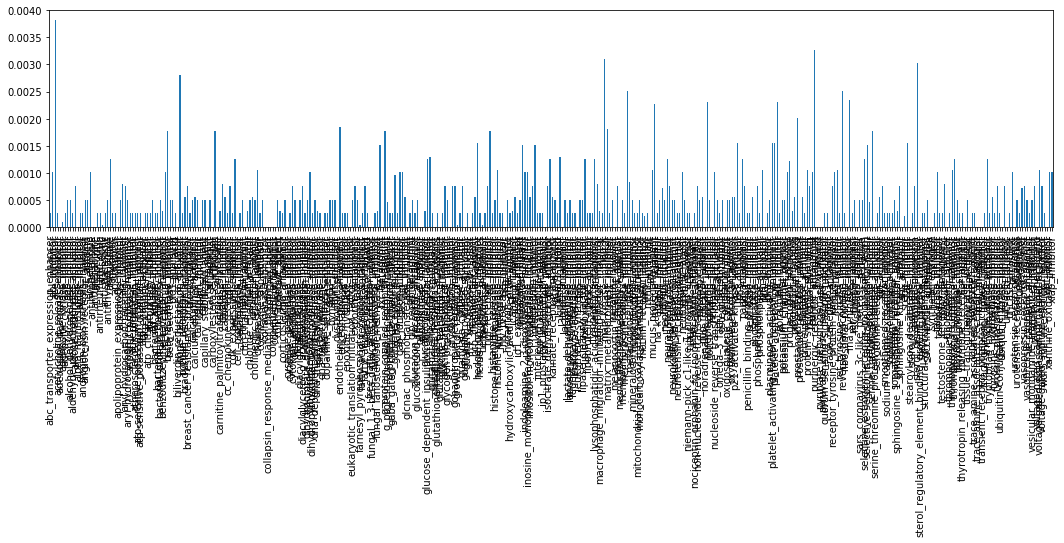

In [117]:
_ = target_nonscored[nonscored_columns].mean().plot.bar()
plt.show()

### examine the similarity between train & test distribution

Use **Kolmogorov-Smirnov** test

In [29]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [18]:
gene_columns = [c for c in trn_feat.columns if c.startswith('g-')]
cell_columns = [c for c in trn_feat.columns if c.startswith('c-')]

print(len(gene_columns), len(cell_columns))

772 100


In [87]:
c = gene_columns[0]
print(c)

train_samples = trn_feat[c].values
test_samples = tst_feat[c].values

print(train_samples.size, train_samples.mean(), train_samples.std())
print(test_samples.size, test_samples.mean(), test_samples.std())


g-0
23814 0.24836629293692786 1.3933692970417957
3982 0.197470894023104 1.373303326859434


In [32]:
ks_2samp(train_samples, test_samples)
# print(s, p)

Ks_2sampResult(statistic=0.037025690099442676, pvalue=0.00017327286606894874)

In [33]:
ks_2samp(train_samples, train_samples)

Ks_2sampResult(statistic=-0.0, pvalue=1.0)

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='kde')` instead of `Series.plot('kde',)`.
  """Entry point for launching an IPython kernel.
/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='kde')` instead of `Series.plot('kde',)`.
  


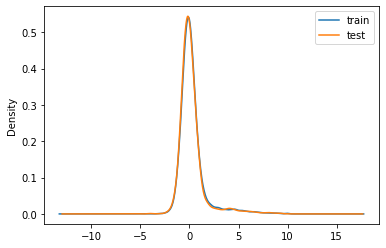

In [37]:
trn_feat[c].plot('kde', label='train')
tst_feat[c].plot('kde', label='test')
# trn_feat[c].plot('hist', bins=100, label='train')
# tst_feat[c].plot('hist', bins=100, label='test')
plt.legend(loc='best')
plt.show()

In [43]:
from scipy import stats

rvs1 = stats.norm.rvs(size=1000, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=100, loc=0, scale=1)
ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.113, pvalue=0.18431266730767837)

In [44]:
ks_2samp(train_samples, test_samples)

Ks_2sampResult(statistic=0.037025690099442676, pvalue=0.00017327286606894874)

In [46]:
from random import sample

In [82]:
train_samples2 = trn_feat[c].sample(len(test_samples)).values

In [52]:
ks_2samp(train_samples2, test_samples)

Ks_2sampResult(statistic=0.050477147162230035, pvalue=7.823473424724248e-05)

In [100]:
ks_dict = dict()
ks_dict['stats'] = []
ks_dict['pvalue'] = []
ks_dict['mean_diff'] = []

features = gene_columns + cell_columns

for c in features:
    train_samples = trn_feat[c].values
    test_samples = tst_feat[c].values
    
    s, p = ks_2samp(train_samples, test_samples)
    ks_dict['stats'].append(s)
    ks_dict['pvalue'].append(p)
    ks_dict['mean_diff'].append(np.abs(train_samples.mean() - test_samples.mean()))
    
ks = pd.DataFrame(ks_dict, index=features)

In [101]:
ks.head()

,stats,pvalue,mean_diff
g-0,0.037026,0.000173,0.050895
g-1,0.019147,0.163838,0.032451
g-2,0.012397,0.670866,0.014737
g-3,0.034068,0.000728,0.032349
g-4,0.018041,0.216749,0.004913


/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


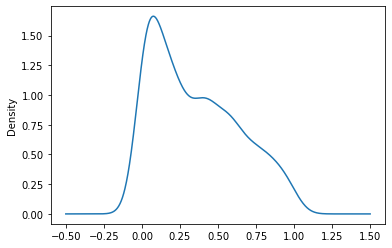

In [56]:
ks.pvalue.plot('density')

In [59]:
critical_features = ks.loc[ks['pvalue'] < 0.1].index.tolist()

In [63]:
c = ks['pvalue'].argmin()

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.
/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  


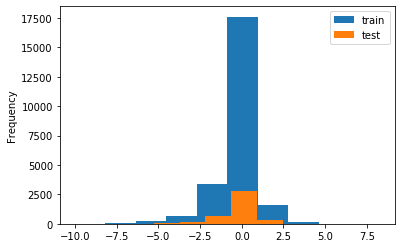

In [65]:
trn_feat[c].plot('hist', label='train')
tst_feat[c].plot('hist', label='test')
plt.legend(loc='best')
plt.show()

In [66]:
tmp = np.array([0, 1, 2, 0, 2, 4, 5])

In [67]:
np.cumsum(tmp)

array([ 0,  1,  3,  3,  5,  9, 14])

In [77]:
y1 = np.cumsum(train_samples)
y2 = np.cumsum(test_samples)

In [86]:
test_samples.mean()

0.197470894023104

In [88]:
train_samples2.mean()

0.24551240582621797

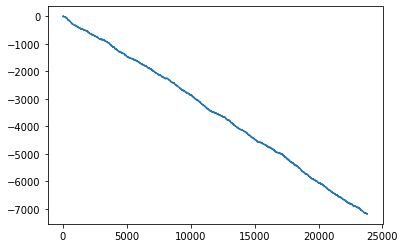

In [92]:
plt.plot(y1)

In [94]:
ks_2samp(train_samples, test_samples)

Ks_2sampResult(statistic=0.037025690099442676, pvalue=0.00017327286606894874)

In [95]:
ks_2samp(test_samples, train_samples)

Ks_2sampResult(statistic=0.037025690099442676, pvalue=0.00017327286606894874)

In [96]:
1.36 / np.sqrt(len(train_samples))

0.00881297896874371

In [21]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

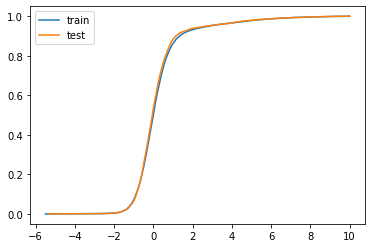

In [99]:
plt.plot(*ecdf(train_samples), label='train')
plt.plot(*ecdf(test_samples), label='test')
plt.legend(loc='best')

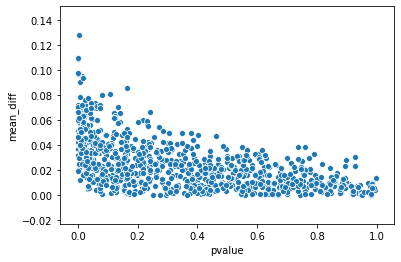

In [103]:
import seaborn as sns

sns.scatterplot(ks['pvalue'], ks['mean_diff'])

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


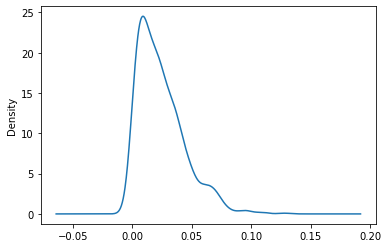

In [104]:
ks['mean_diff'].plot('density')

In [18]:
from scipy import stats

np.random.seed(12345678)

In [19]:
from scipy.stats import ks_2samp

def plot_ks(distr1, distr2):
    d_stats, p_value = ks_2samp(distr1, distr2)
    print(d_stats, ', ', p_value)
    
    plt.plot(*ecdf(distr1), label='distr1')
    plt.plot(*ecdf(distr2), label='distr2')
    plt.legend(loc='best')
    plt.show()
    
    return

KstestResult(statistic=0.22666666666666666, pvalue=7.295616946012551e-06)
0.22666666666666666 ,  7.295616946012551e-06


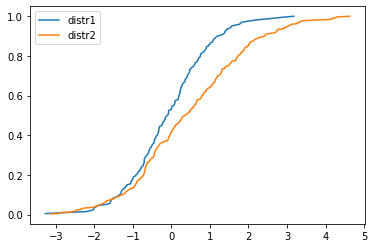

In [34]:
rvs1 = stats.norm.rvs(size=200, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=300, loc=0.5, scale=1.5)
print(stats.mstats.ks_twosamp(rvs1, rvs2))
plot_ks(rvs1, rvs2)

0.20666666666666667 ,  6.073229183778395e-05


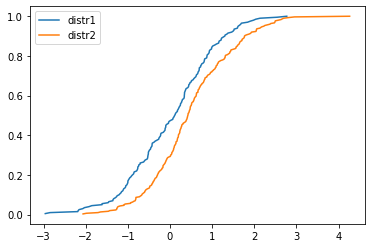

In [119]:
rvs1 = stats.norm.rvs(size=200, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=300, loc=0.5, scale=1)

# stats.ks_2samp(rvs1, rvs2)
plot_ks(rvs1, rvs2)

0.041 , 0.37012017606173
0.041 ,  0.37012017606173


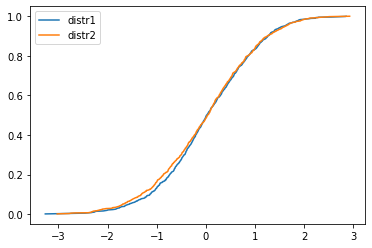

In [40]:
rvs1 = stats.norm.rvs(size=1000, loc=0, scale=1)
rvs2 = stats.norm.rvs(size=1000, loc=0, scale=1)

ds, pv = stats.mstats.ks_twosamp(rvs1, rvs2)
print(ds, ',', pv)
plot_ks(rvs1, rvs2)

0.20916666666666667 ,  0.9904774590824749


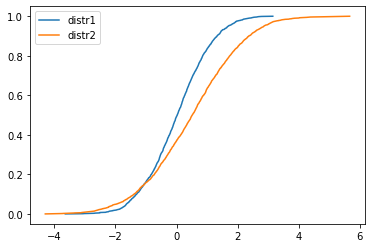

In [146]:
rvs1 = stats.norm.rvs(size=2000, loc=0, scale=1)
rvs2 = stats.norm.rvs(size=3000, loc=0.5, scale=1.5)

# stats.ks_2samp(rvs1, rvs2)
plot_ks(rvs1, rvs2)

0.018166666666666668 ,  1.0


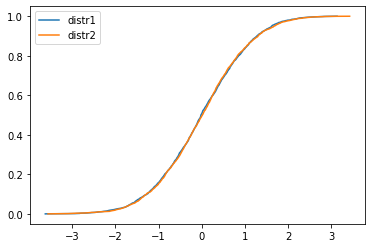

In [122]:
rvs1 = stats.norm.rvs(size=2000, loc=0, scale=1)
rvs2 = stats.norm.rvs(size=3000, loc=0, scale=1)

# stats.ks_2samp(rvs1, rvs2)
plot_ks(rvs1, rvs2)

#### scipy.stats.ks_2samp is NOT STABLE and returns p-value which is uniformly distributed in [0, 1]

In [45]:
rvs1 = stats.norm.rvs(size=2000, loc=0, scale=1)

stats.kstest(rvs1, 'norm')

KstestResult(statistic=0.01712570587134682, pvalue=0.5943337969422182)

In [46]:
slice(2, 4)

slice(2, 4, None)

In [47]:
# import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
print(X)
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)

[[-0.13824745]
 [ 0.25568053]
 [ 0.28647607]
 [ 0.31445874]
 [ 0.44871043]
 [ 0.4621607 ]
 [ 0.47419529]
 [ 0.53041875]
 [ 0.53601089]
 [ 0.57826693]
 [ 0.58341858]
 [ 0.6000393 ]
 [ 0.60264963]
 [ 0.61096581]
 [ 0.66340465]
 [ 0.69025943]
 [ 0.71610905]
 [ 0.7375221 ]
 [ 0.7446845 ]
 [ 0.86356838]
 [ 0.87351977]
 [ 0.94101309]
 [ 0.9668895 ]
 [ 1.0602233 ]
 [ 1.06743866]]


array([[0.        ],
       [0.09871873],
       [0.10643612],
       [0.11754671],
       [0.21017437],
       [0.21945445],
       [0.23498666],
       [0.32443642],
       [0.33333333],
       [0.41360794],
       [0.42339464],
       [0.46257841],
       [0.47112236],
       [0.49834237],
       [0.59986536],
       [0.63390302],
       [0.66666667],
       [0.68873101],
       [0.69611125],
       [0.81280699],
       [0.82160354],
       [0.88126439],
       [0.90516028],
       [0.99319435],
       [1.        ]])

In [48]:
qt = QuantileTransformer(n_quantiles=20, random_state=0)
qt.fit_transform(X)

array([[0.        ],
       [0.05157064],
       [0.08454802],
       [0.11111363],
       [0.19302231],
       [0.20973909],
       [0.23110744],
       [0.31170381],
       [0.31905595],
       [0.39429247],
       [0.41426857],
       [0.47048734],
       [0.4862578 ],
       [0.52954201],
       [0.58691638],
       [0.62568648],
       [0.66879584],
       [0.72193106],
       [0.73787826],
       [0.80030027],
       [0.81751919],
       [0.88489394],
       [0.90343675],
       [0.98804931],
       [1.        ]])

### Gauss Rank Transformation

In [91]:
from scipy.special import erfinv

class GaussRankScaler():
    def __init__(self):
        self.epsilon = 0.001
        self.lower = -1 + epsilon
        self.upper = 1 - epsilon
        self.range = self.upper - self.lower
        
    def fit_transform(self, X):
        i = np.argsort(X, axis=0)
        j = np.argsort(i, axis=0)
        
        assert (j.min() == 0).all()
        assert (j.max() == len(j) - 1).all()
        
        j_range = len(j) - 1
        self.divider = j_range / self.range
        
        transformed = j / self.divider
        transformed = transformed - self.upper
        transformed = erfinv(transformed)
        
        return transformed

In [102]:
X = np.arange(-0.99, 1, 0.01)
tX = GaussRankScaler().fit_transform(X)

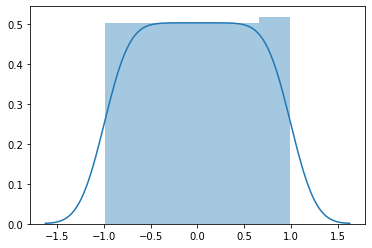

In [103]:
sns.distplot(X)

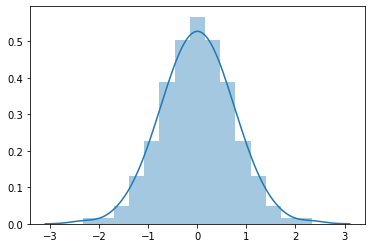

In [104]:
sns.distplot(tX)

In [111]:
c = gene_columns[0]

In [112]:
X = trn_feat[c].values

In [113]:
tX = GaussRankScaler().fit_transform(X)

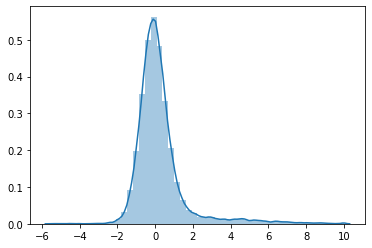

In [114]:
sns.distplot(X)

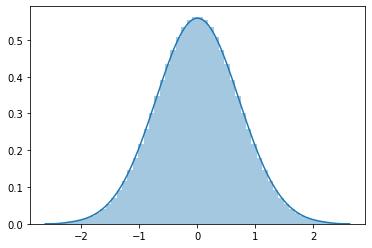

In [115]:
sns.distplot(tX)